In [43]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:

path = '/content/data.txt'

data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [45]:
#show data details
print('data = \n' ,data.head(5) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')

data = 
       Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
**************************************
data.describe = 
            Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000
**************************************


In [46]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]


Text(0, 0.5, 'Exam 2 Score')

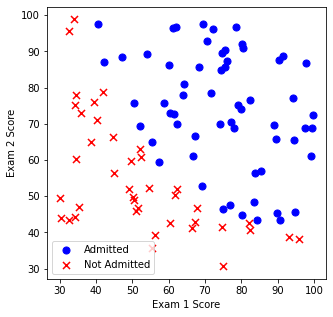

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'],
           s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'],
           s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [48]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

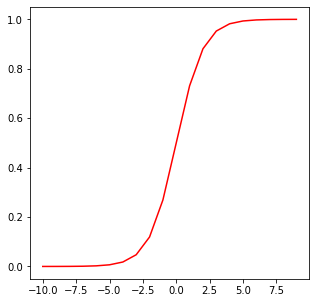

In [49]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')

In [50]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [51]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values) 
y = np.array(y.values)
theta = np.zeros(3)

print()
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)



X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


In [52]:
# Function To Predect value

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # Function Classification The connected Eqution
    
    #The Fisrt Part 
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    
    #The Seconed Part
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    
    return np.sum(first - second) / (len(X))

In [53]:
thiscost = cost(theta, X, y)
print('cost = ' , thiscost)

cost =  0.6931471805599453


In [54]:
# Calculate The Erorre

def gradient(theta, X, y):
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y  # The prediction value - real value
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [55]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
print('The Result is : ' , result)
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)

The Result is :  (array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

cost after optimize =  0.20349770158947458


In [56]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [57]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or
                 (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
